# Student Performance Indicator

#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 columns and 1000 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

### 2.2 Dataset information

- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [5]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
print("Categories in Gender :", end=" ")
print(df['gender'].unique())

print("Categories in Race Ethnicity:", end=" ")
print(df['race_ethnicity'].unique())

print("Categories in Lunch :", end=" ")
print(df['lunch'].unique())

print("Categories in test preparation course :", end=" ")
print(df['test_preparation_course'].unique())

Categories in Gender : ['female' 'male']
Categories in Race Ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in Lunch : ['standard' 'free/reduced']
Categories in test preparation course : ['none' 'completed']


In [11]:
numeric_features=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']

print('We have {} numerical features:{}'.format(len(numeric_features),numeric_features))
print('We have {} categorical features:{}'.format(len(categorical_features),categorical_features))
      

We have 3 numerical features:['math_score', 'reading_score', 'writing_score']
We have 5 categorical features:['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [12]:
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [13]:
df['total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['average']=df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [14]:
reading_full=df[df['reading_score']==100]['average'].count()
writing_full=df[df['writing_score']==100]['average'].count()
math_full=df[df['math_score']==100]['average'].count()


print(f'No of students with full marks in Reading:{reading_full}')
print(f'No of students with full marks in Writing:{writing_full}')
print(f'No of students with full marks in Math:{math_full}')

No of students with full marks in Reading:17
No of students with full marks in Writing:14
No of students with full marks in Math:7


In [15]:
reading_less_20=df[df['reading_score']<20]['average'].count()
writing_less_20=df[df['writing_score']<20]['average'].count()
math_less_20=df[df['math_score']<20]['average'].count()

print( f'No of students with leass than 20 marks in Reading:{reading_less_20}')
print( f'No of students with leass than 20 marks in Writing:{writing_less_20}')
print( f'No of students with leass than 20 marks in Maths:{math_less_20}')

No of students with leass than 20 marks in Reading:1
No of students with leass than 20 marks in Writing:3
No of students with leass than 20 marks in Maths:4


### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

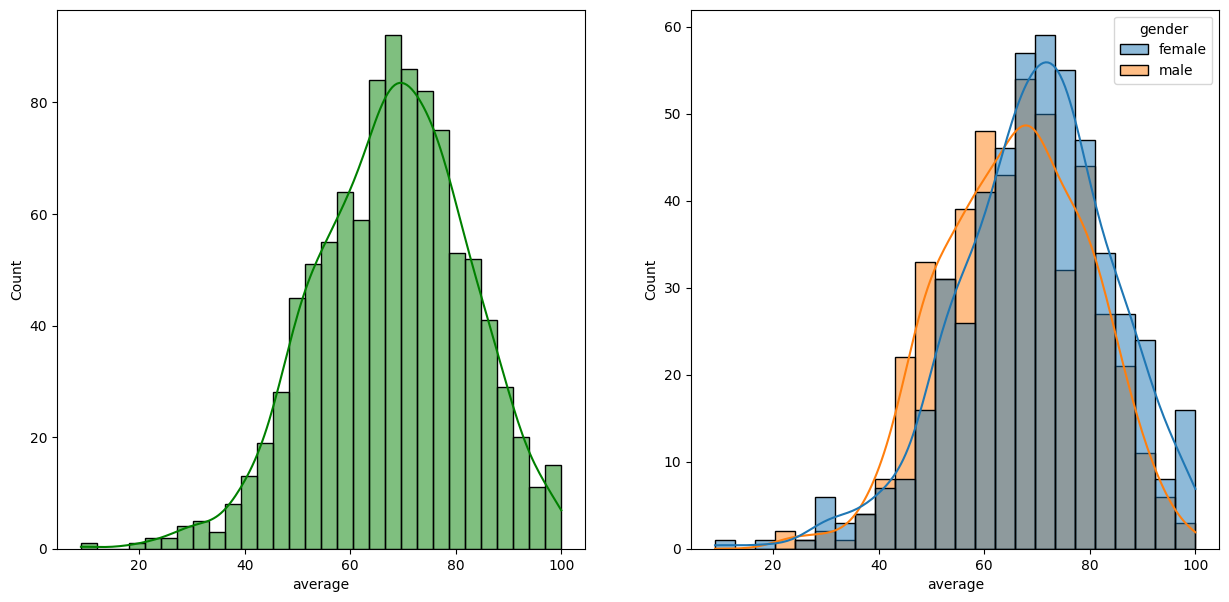

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

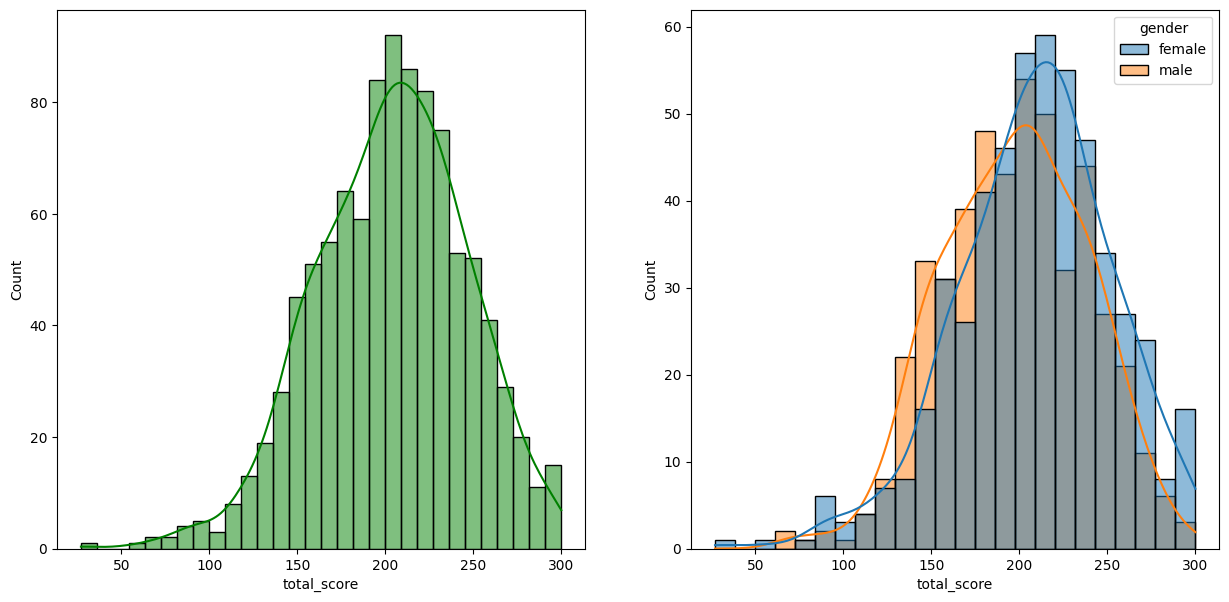

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

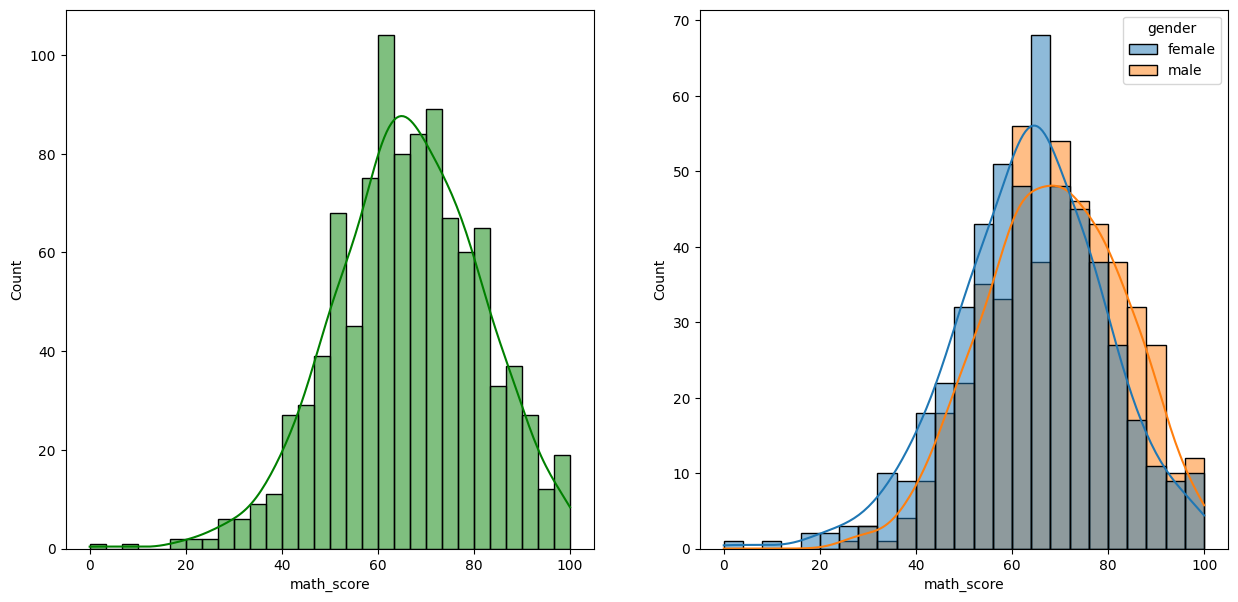

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='math_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='math_score',kde=True,hue='gender')
plt.show()

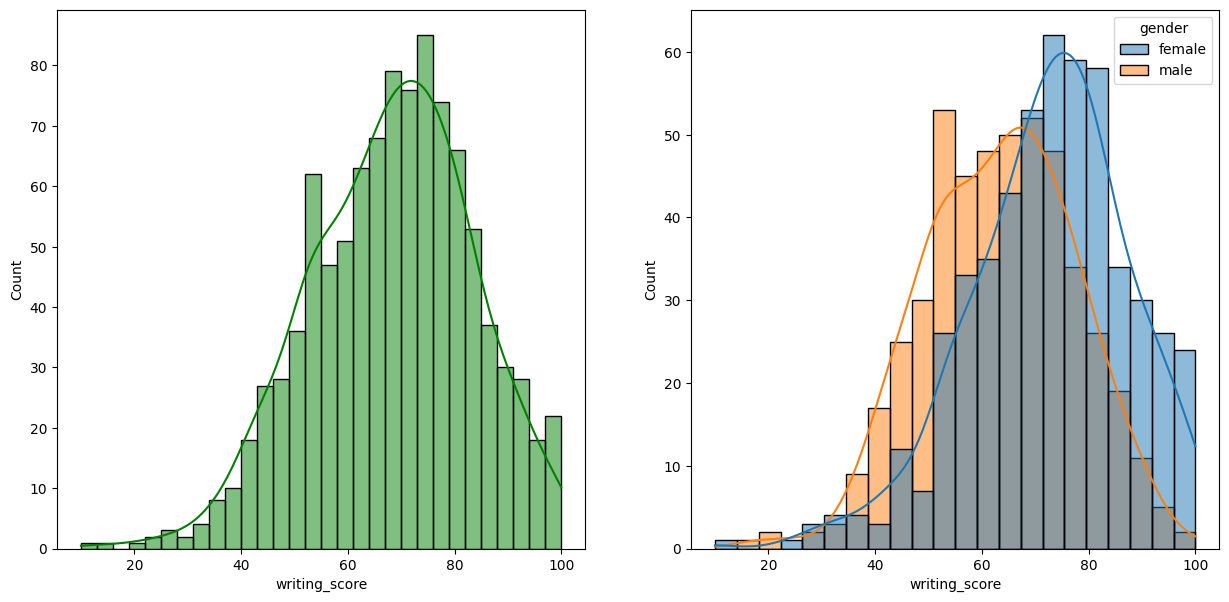

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='writing_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='writing_score',kde=True,hue='gender')
plt.show()

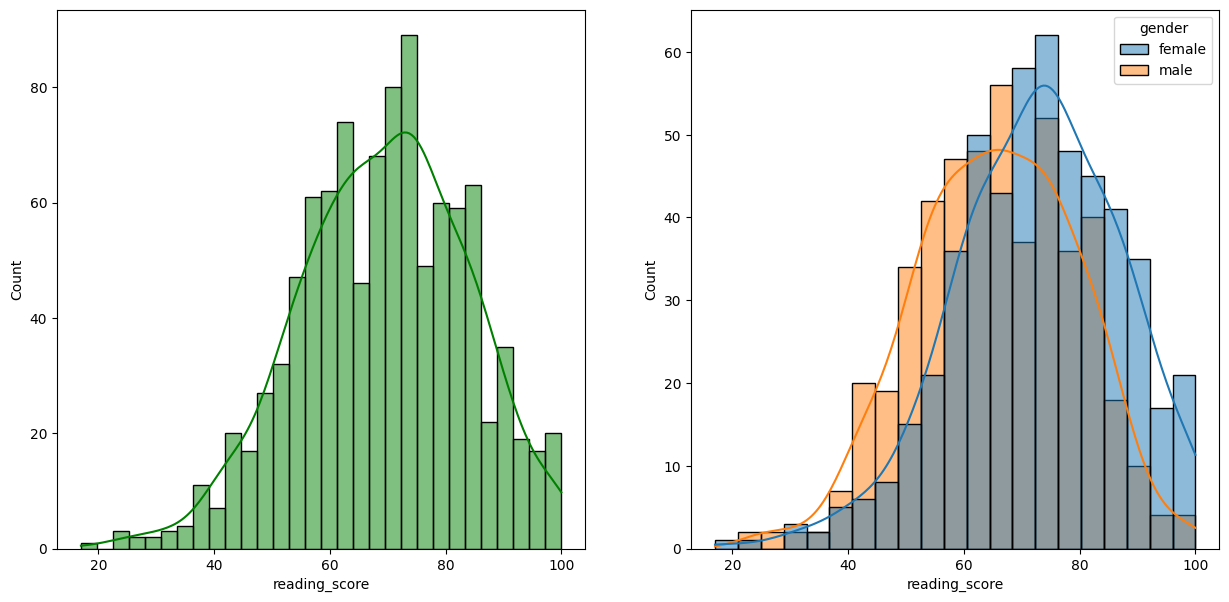

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='reading_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='reading_score',kde=True,hue='gender')
plt.show()

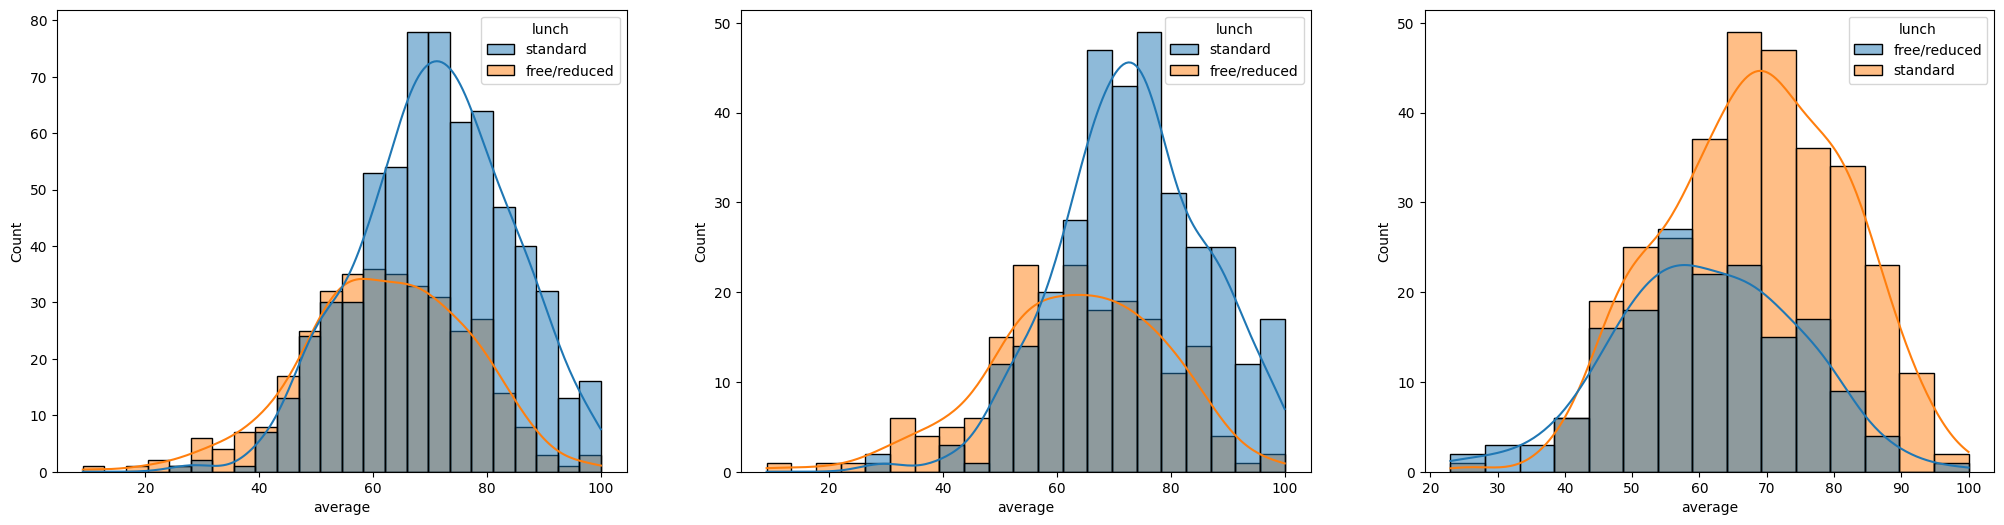

In [21]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

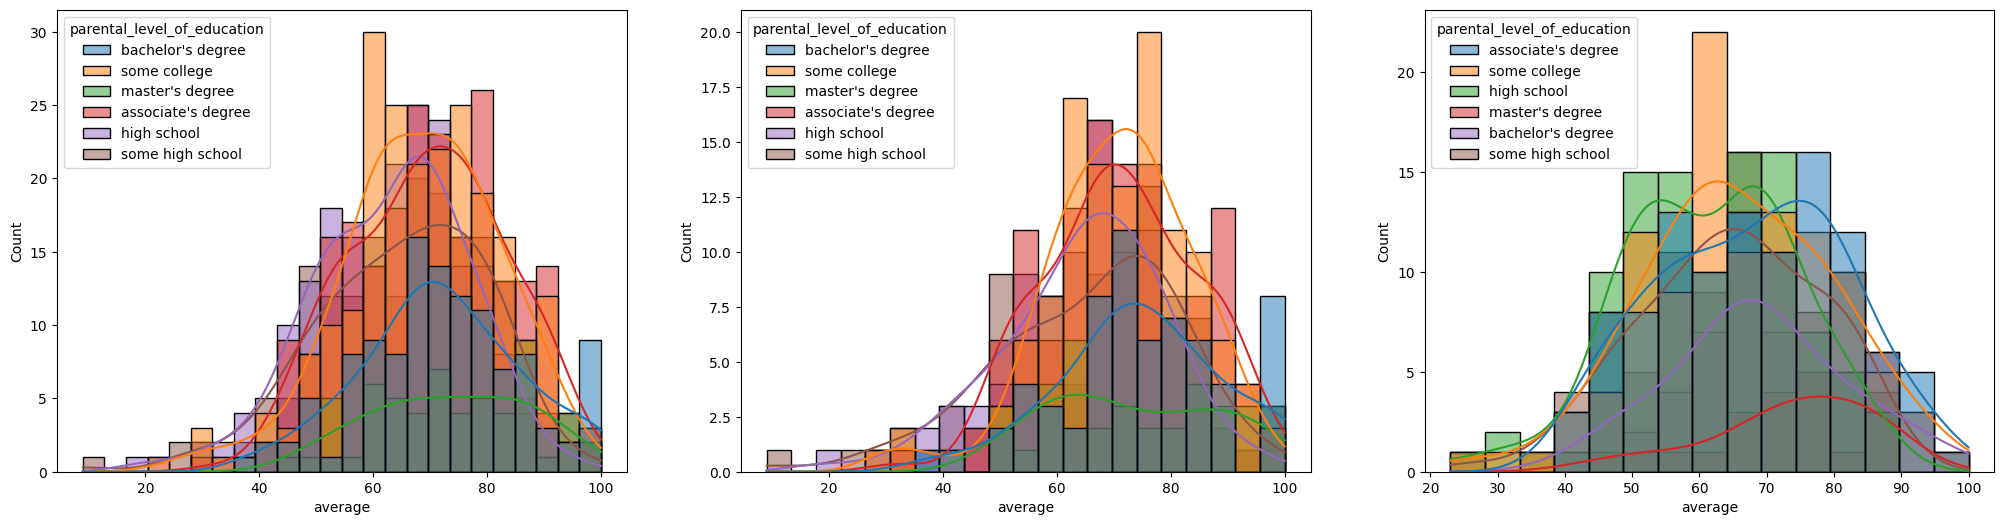

In [22]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

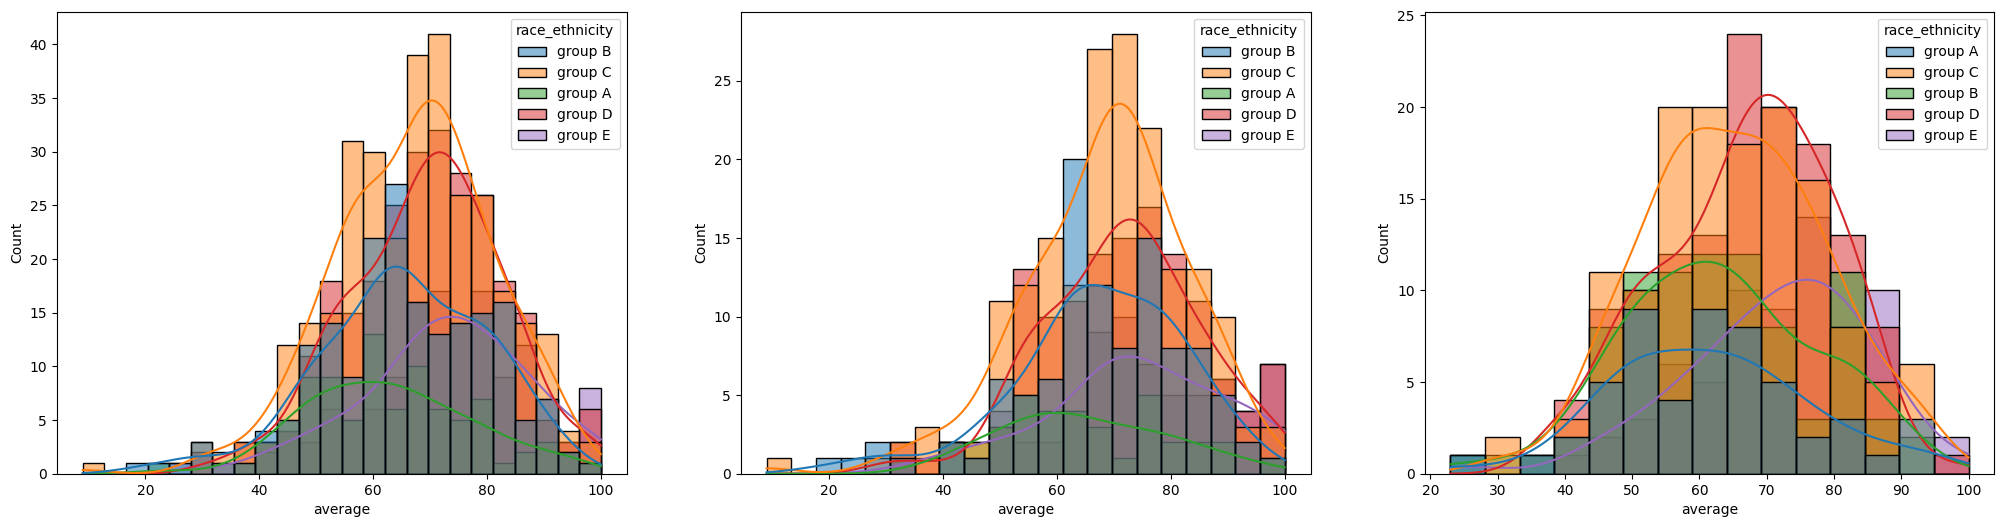

In [23]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

## Insights:
Students of group A and B tends to perform poor in the exam while group E students perform best irrespective of their gender.

## 4.2 Maximum score of students in all the three subjects

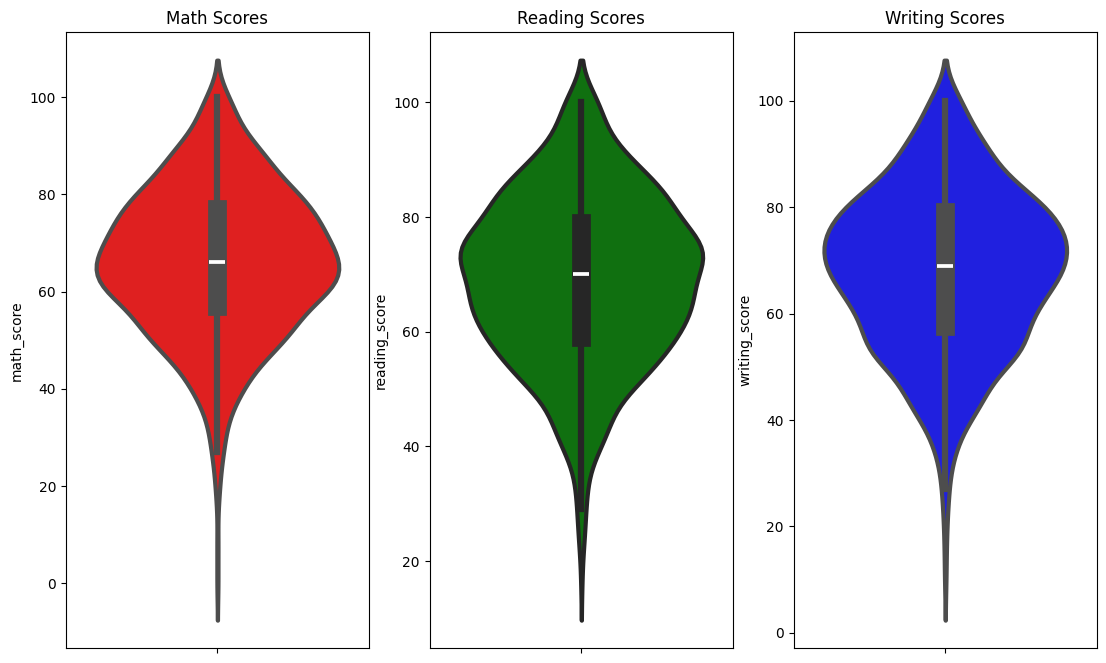

In [24]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('Math Scores')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1,4,2)
plt.title('Reading Scores')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1,4,3)
plt.title('Writing Scores')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

## Insights:
1.Maximum students scored in between 60-80 in Maths.

2.Maximum students scored in between 50-80 in Reading and Writing.

## Multivariate analysis using pieplot

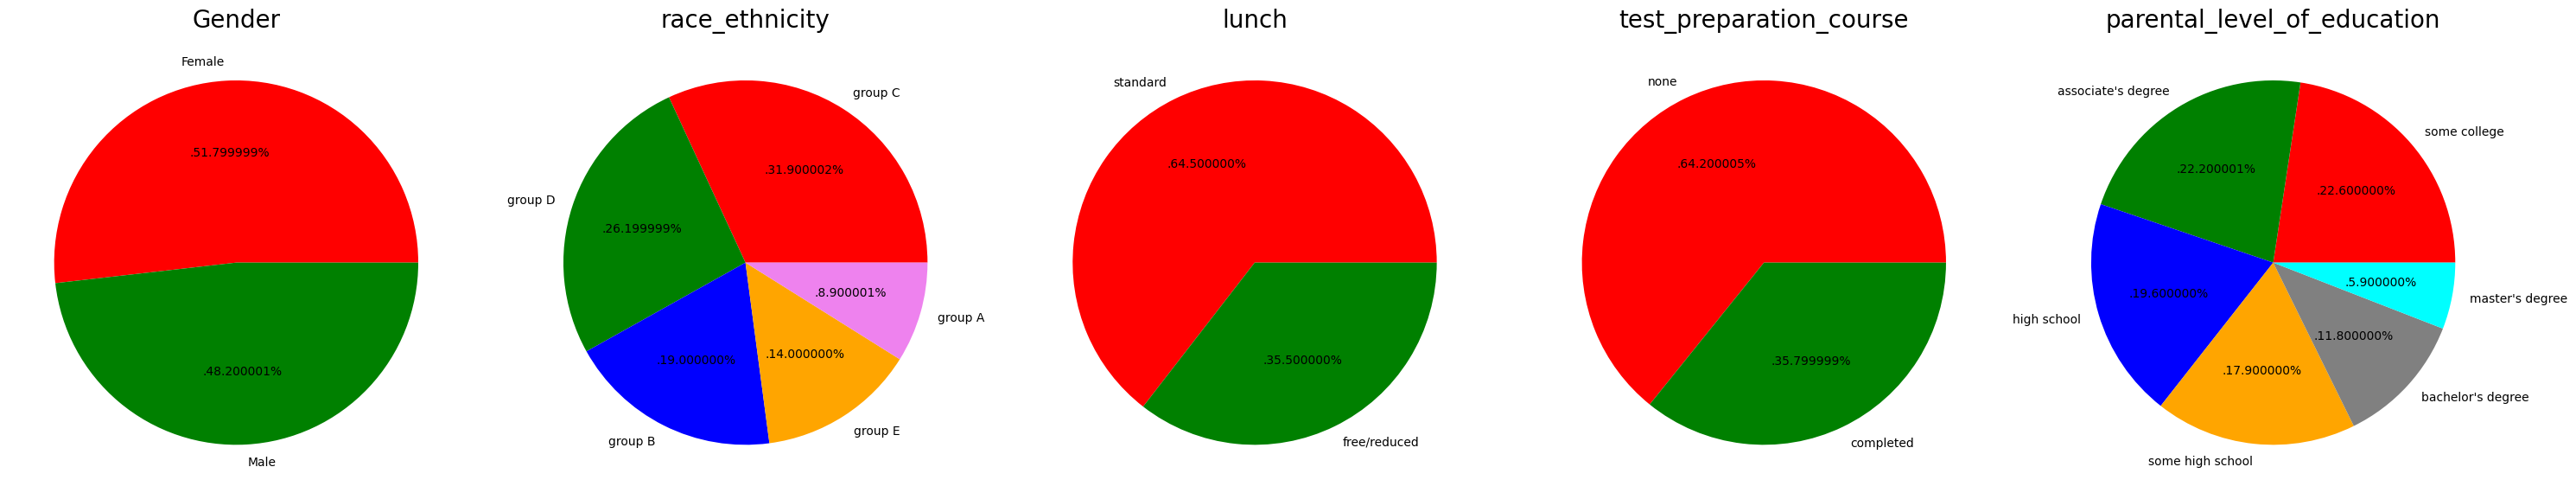

In [25]:
plt.rcParams['figure.figsize']=(30,12)

plt.subplot(1,5,1)
size=df['gender'].value_counts()
labels='Female','Male'
color=['red','green']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Gender',fontsize=20)
plt.axis('off')



plt.subplot(1,5,2)
size=df['race_ethnicity'].value_counts()
labels='group C','group D','group B','group E','group A'
color=['red','green','blue','orange','violet']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('race_ethnicity',fontsize=20)
plt.axis('off')



plt.subplot(1,5,3)
size=df['lunch'].value_counts()
labels='standard','free/reduced'
color=['red','green']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('lunch',fontsize=20)
plt.axis('off')



plt.subplot(1,5,4)
size=df['test_preparation_course'].value_counts()
labels='none','completed'
color=['red','green']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('test_preparation_course',fontsize=20)
plt.axis('off')



plt.subplot(1,5,5)
size=df['parental_level_of_education'].value_counts()
labels= 'some college',"associate's degree", 'high school', 'some high school',"bachelor's degree", "master's degree"
color=['red','green','blue','orange','grey','cyan']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('parental_level_of_education',fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()

#####  Insights:
- Number of Male and Female students is almost equal(Females a bit more). 
- Number students are greatest in Group C.
- Number of students who have standard lunch are greater.
- Number of students who have not enrolled in any test preparation course is greater.
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree".

## 4.4 Feature Wise Visualization

#### 4.4.1  Gender Column

## Univariate Analysis

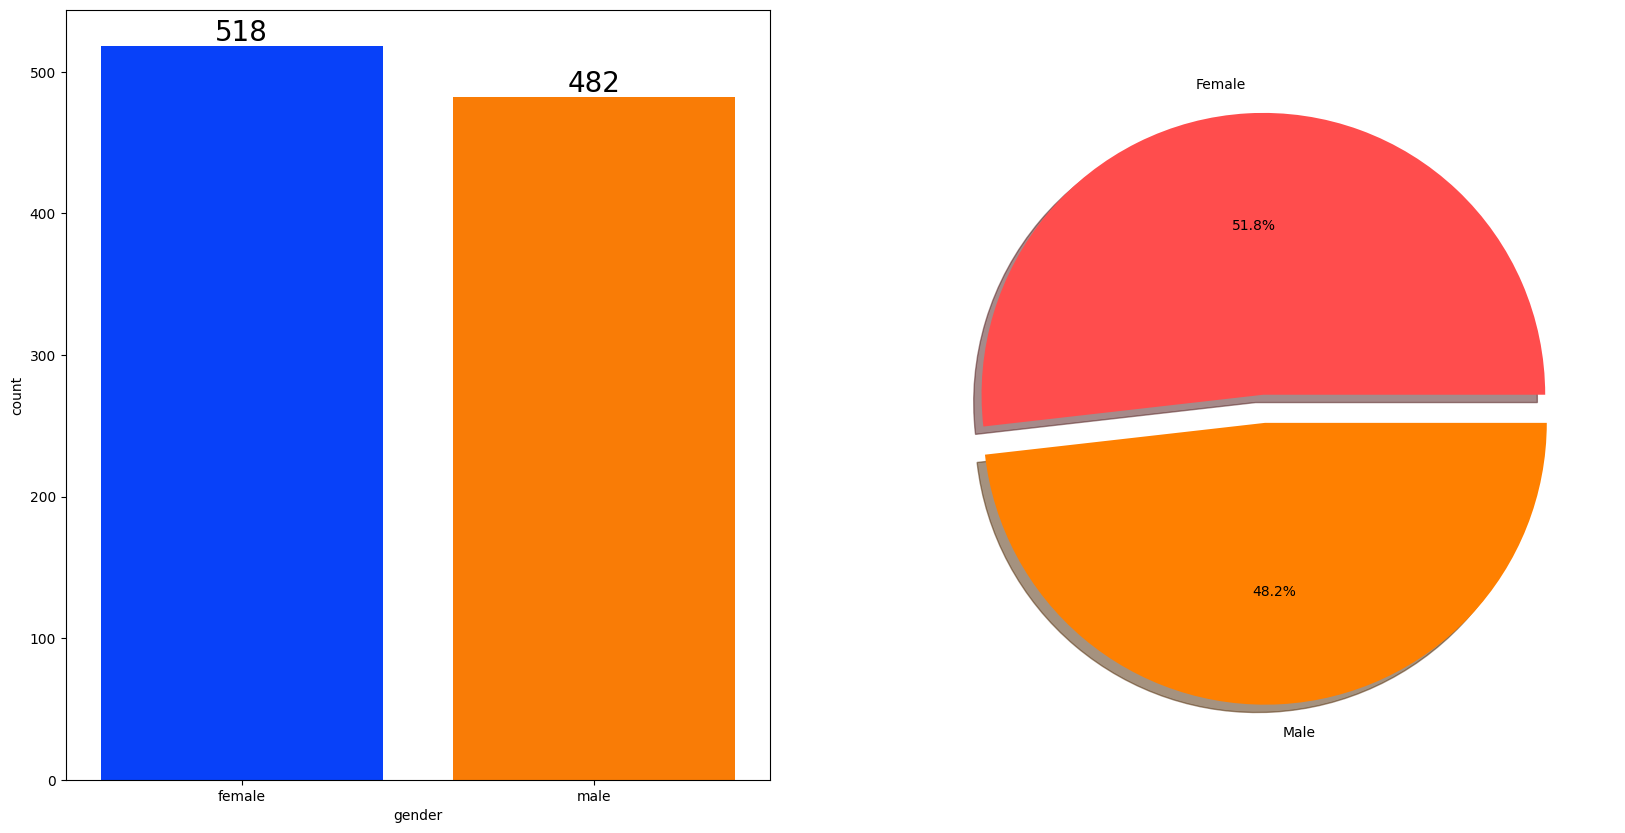

In [26]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(df['gender'].value_counts(),labels=['Female','Male'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

## Insights:
- Gender has almost balanced data with female students 52 percentage and 48 percentage male.

## Bivariate analysis(impact of gender on student's performance)

In [27]:
gender_group = df.groupby('gender')['average'].mean()
print(gender_group)

gender
female    69.569498
male      65.837483
Name: average, dtype: float64


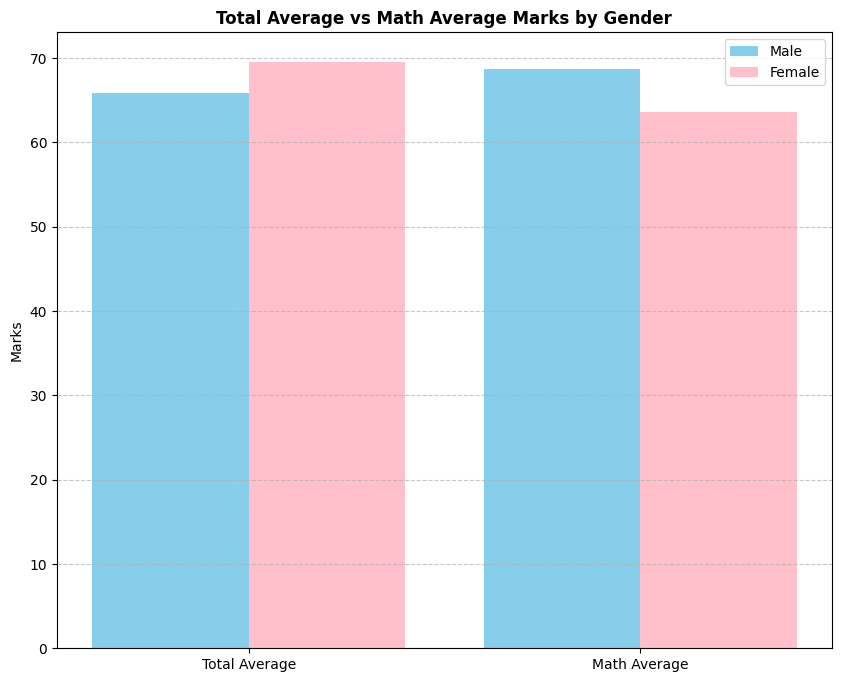

In [28]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']

gender_group = df.groupby('gender')[['average', 'math_score']].mean()

# Now safe to access like this
female_scores = [gender_group.loc['female', 'average'], gender_group.loc['female', 'math_score']]
male_scores = [gender_group.loc['male', 'average'], gender_group.loc['male', 'math_score']]
X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label='Male', color='skyblue')
plt.bar(X_axis + 0.2, female_scores, 0.4, label='Female', color='pink')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total Average vs Math Average Marks by Gender", fontweight='bold')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Insights :
- On an average females have a better overall score than men.
- But males have scored higher in Maths.

## Race/Ethnicity column 


## Univariate Analysis

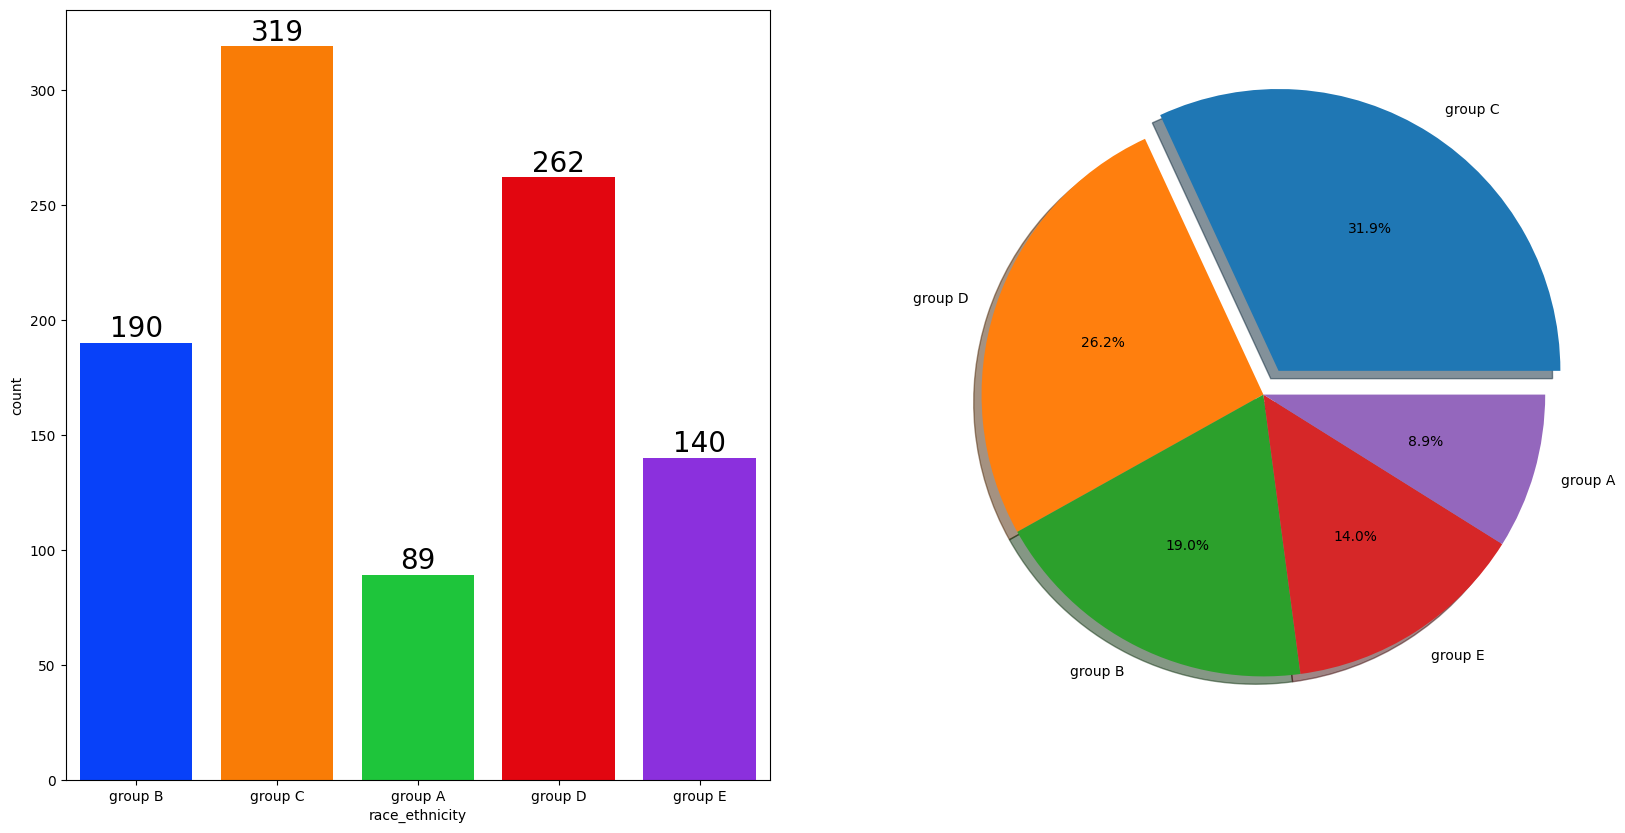

In [29]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

## Insights:
- Mostly students belong to group C followed by group D.
- Lowest number of students are from group A.

## Bivariate Analysis (Impact of race or ethnicity on performance)

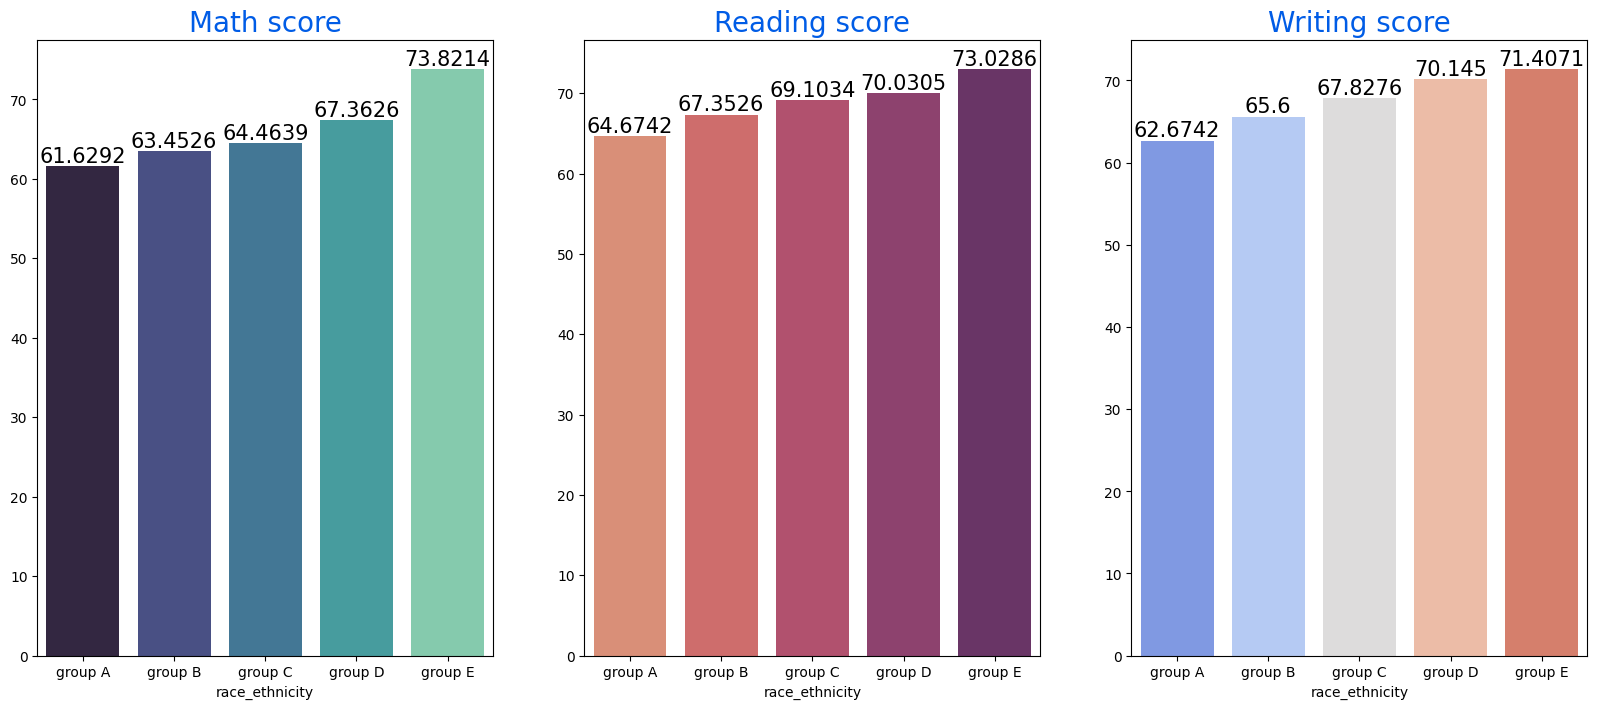

In [30]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)


plt.show()

## Insights:
- Group E students have performed highest
- Group A students have performed lowest
- Socio Economic status impacts the performance in all the courses.

## 4.4.3 Parental Level Of Education Column

## Univariate Aanalysis

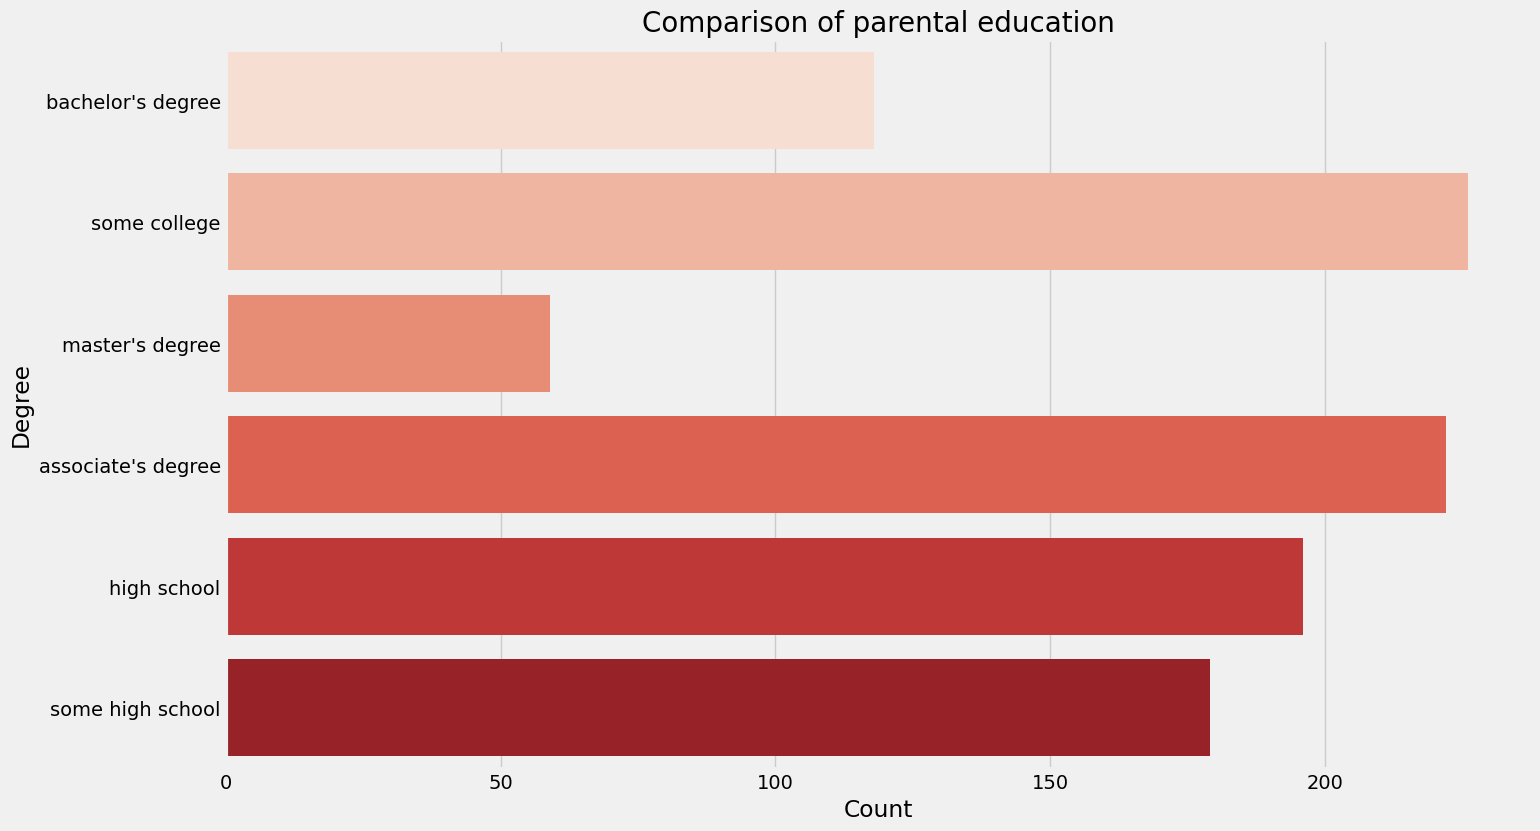

In [31]:
plt.rcParams['figure.figsize']=(15,9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'],palette='Reds')
plt.title('Comparison of parental education',fontsize=20,fontweight=30)
plt.ylabel('Degree')
plt.xlabel('Count')
plt.show()

## Bivariate Analysis (impact on the performance of the student)

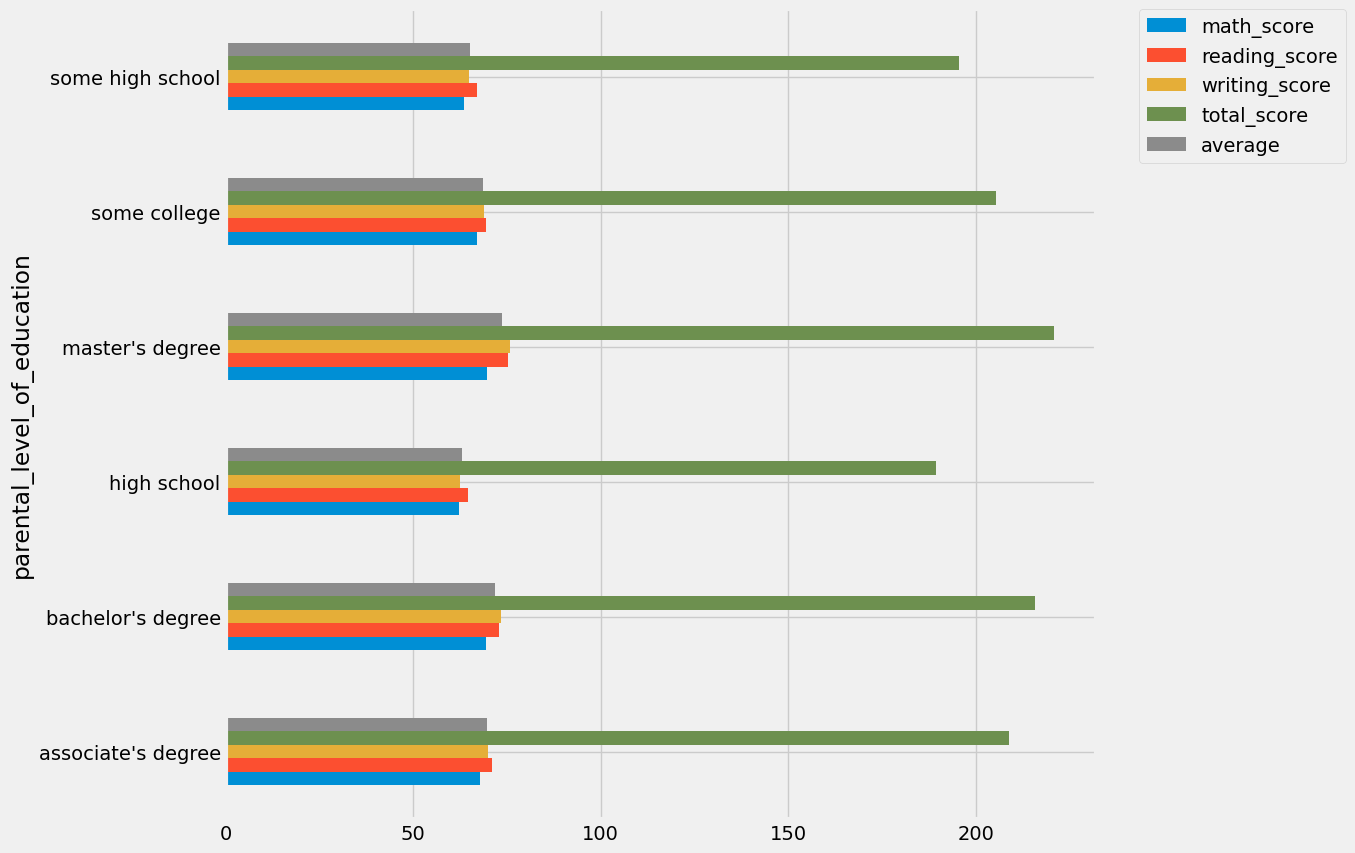

In [32]:
df.groupby('parental_level_of_education').mean(numeric_only=True).plot(
    kind='barh',
    figsize=(10, 10)
)
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
plt.show()

## Insights:
- Students whose parents have some masters or Bachelor level of eduucation have highest total scores.
- Students with less parental education perform lower.

## 4.4.4 LUNCH COLUMN

## Univariate Analysis

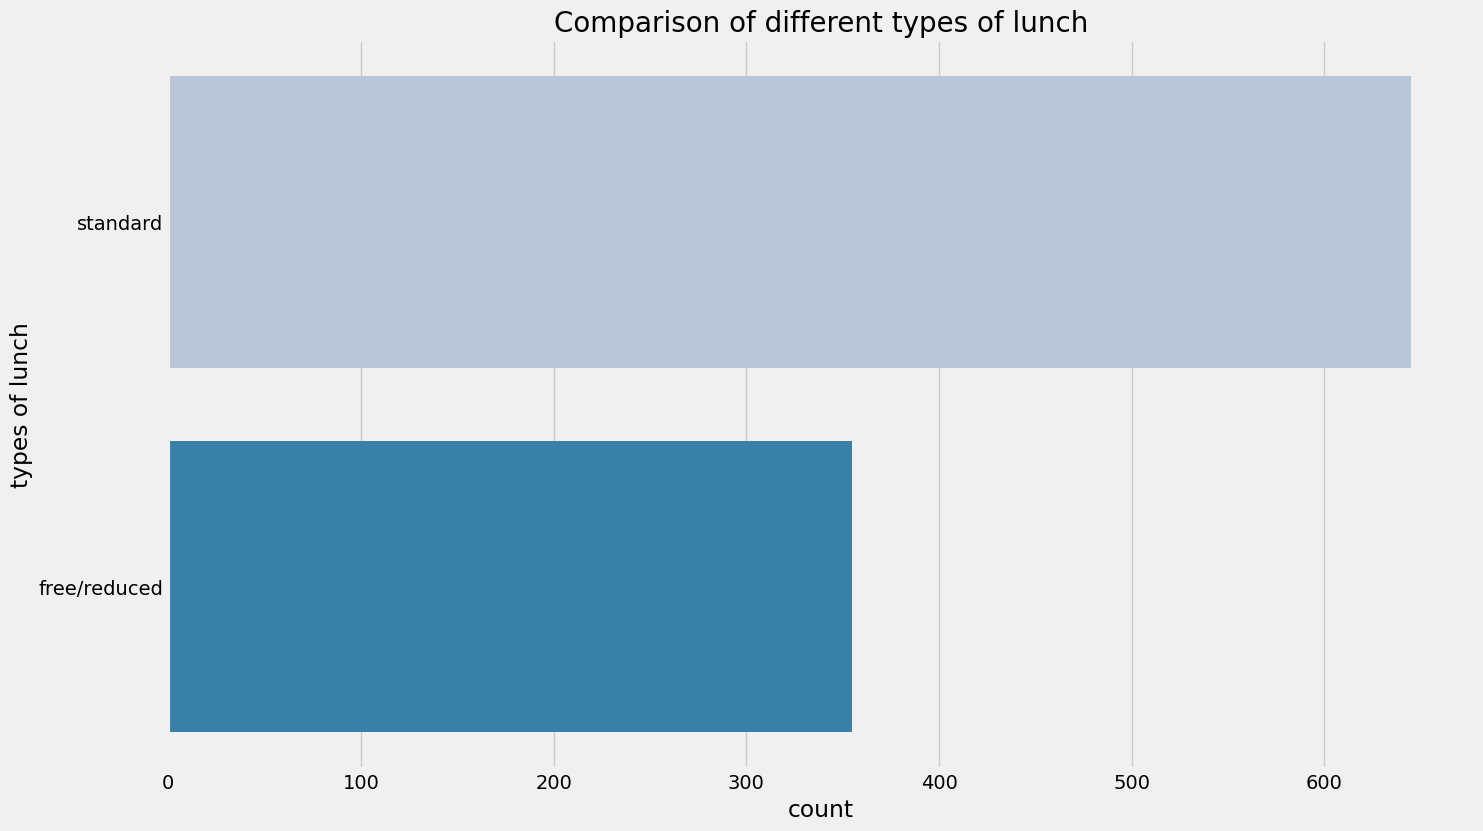

In [33]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.ylabel('types of lunch')
plt.xlabel('count')
plt.show()

## Insights:
- Maximum number of students are being served with standard Lunch.

## Bivariate Analysis(Impact on the performance of the student)

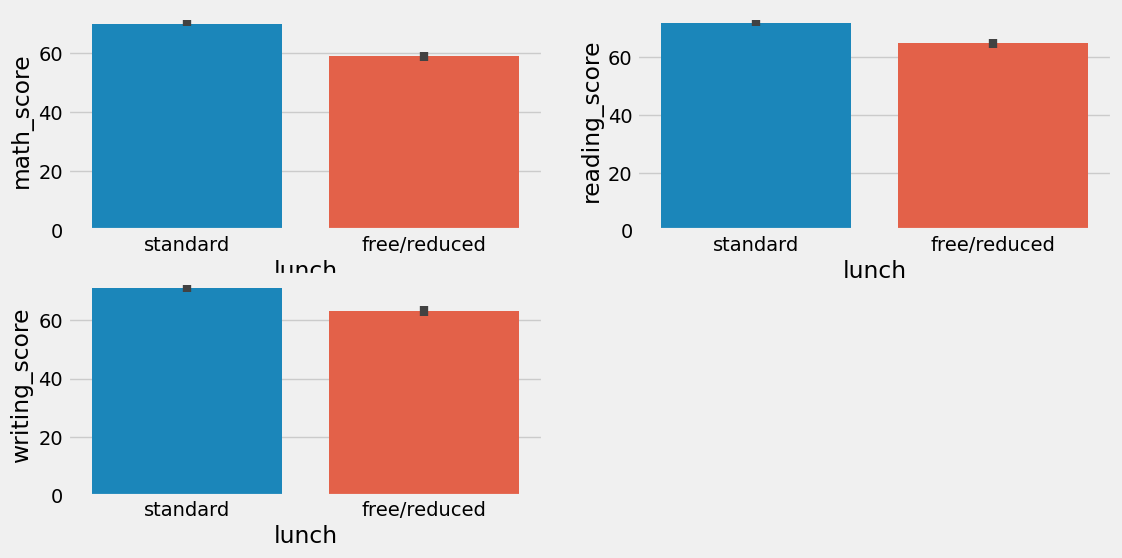

In [34]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['lunch'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['lunch'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['lunch'])
plt.show()

#### Insights 
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

#### 4.4.5 TEST PREPARATION COURSE COLUMN 
- Which type of lunch is most common amoung students ?
- Is Test prepration course has any impact on student's performance ?

## Univariate Analysis

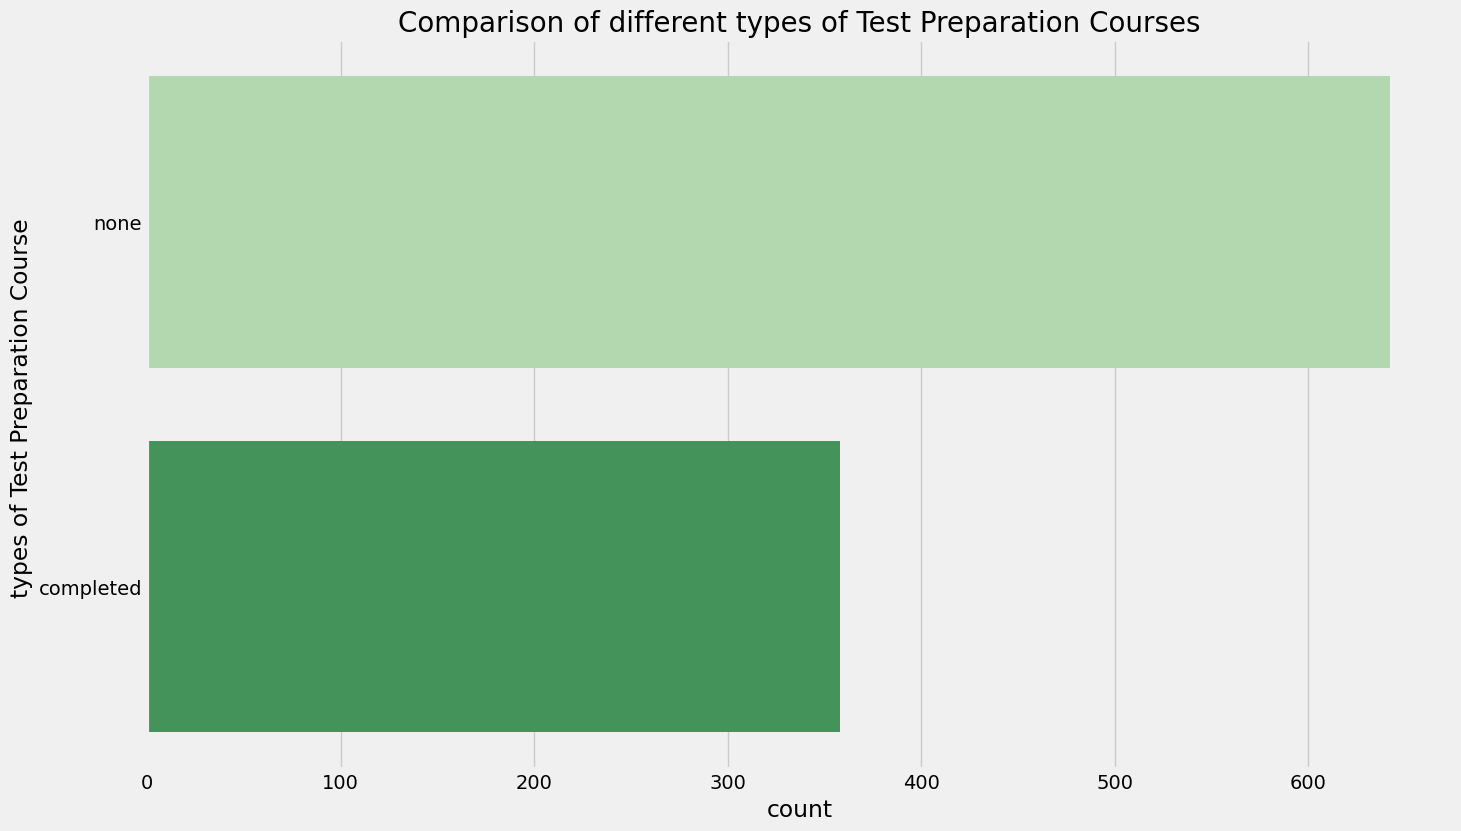

In [35]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['test_preparation_course'], palette = 'Greens')
plt.title('Comparison of different types of Test Preparation Courses', fontweight = 30, fontsize = 20)
plt.ylabel('types of Test Preparation Course ')
plt.xlabel('count')
plt.show()

## Insights:
- Maximum students are having no test preparation courses.

## Bivariate Analysis(Impact on the perfomance of the students)

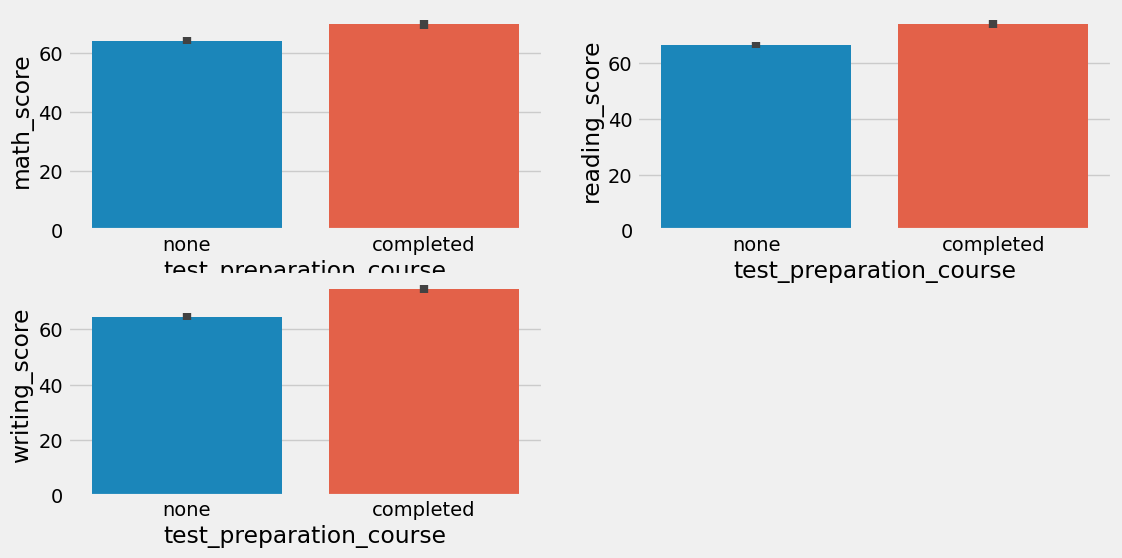

In [36]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['test_preparation_course'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['test_preparation_course'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['test_preparation_course'], y=df['writing_score'], hue=df['test_preparation_course'])
plt.show()

## Insights:
- The students who have completed some test preparation courses are having better performance than those having none.

## Checking for the outliers


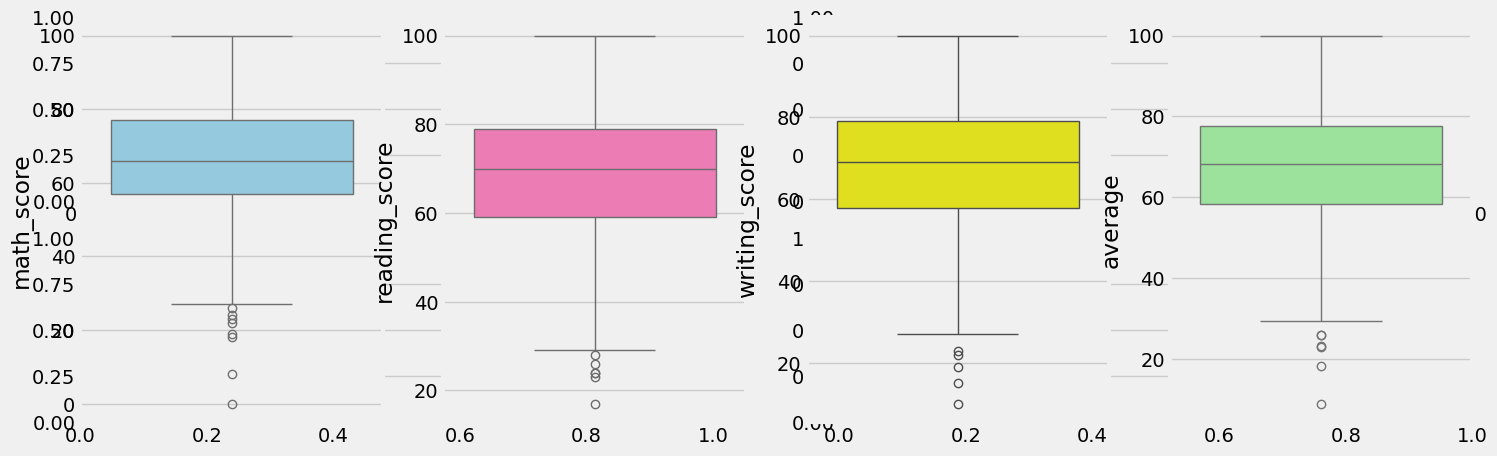

In [37]:
plt.subplots(2,2,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

## Multivariatre Analysis using pairplot

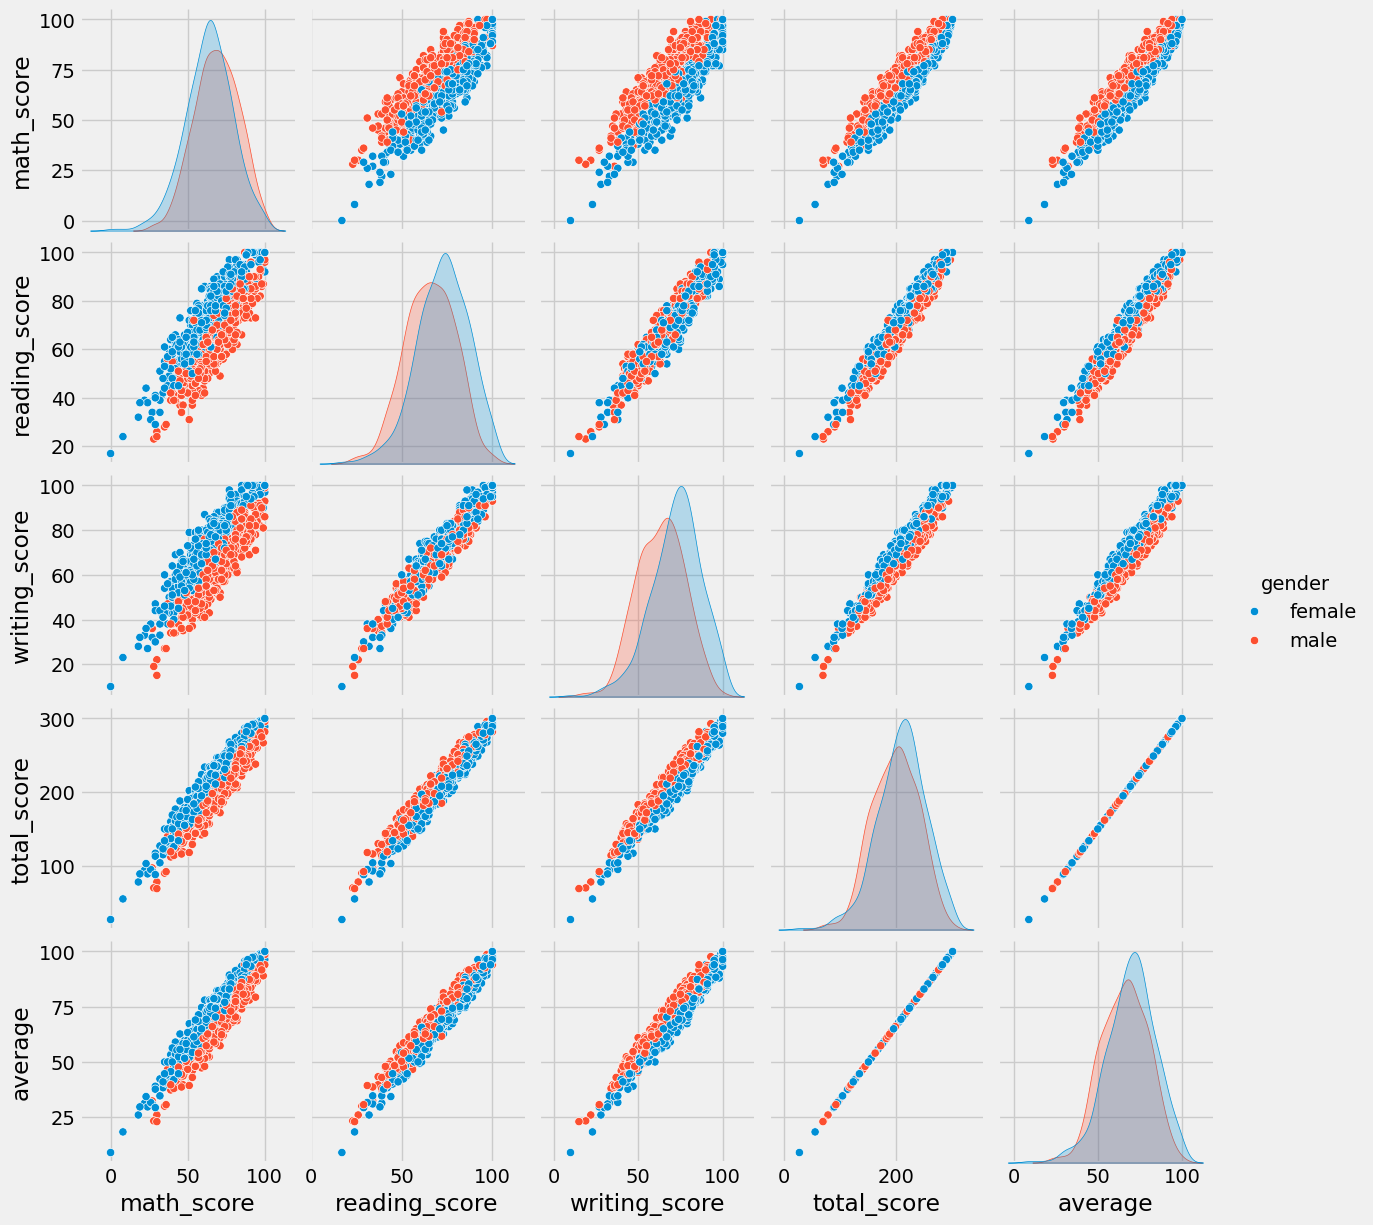

In [38]:
sns.pairplot(df,hue = 'gender')
plt.show()

## Insights:
- From the multivariate analysis, we observe that all the scores are incresing linearly with each other.